# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    - [ML]https://developers.google.com/machine-learning/crash-course/ml-intro?hl=ko
---
* [1.비지도학습 ](#복습) <br>
     *  [1.1 KMeans](#KMeans)
     *  [1.2  AgglomerativeClustering ](#AgglomerativeClustering)
          * [dendrogram](#dendrogram)<br>
     * [1.3 DBSCAN](#DBSCAN)<br>
* [2. Deep Learning](#Deep-Learning) <br>
     *  [2.1 Perceptron](#Perceptron)
         * [OR](#OR)<br>
         * [And](#And)<br>
         * [XOR](#OR)<br>
     *  [2.2Multi-Layer Perceptron(MLP)/Aritificial Neural Network ](#Multi-Layer-Perceptron(MLP)/Aritificial-Neural-Network)
 * [책 추천](#책-추천)<br>

|지도 학습|비지도 학습|
|:--|:--|
| classificaiton, <br>regression| clustering, <br>PCA|

## 비지도학습
   - 비지도 학습은 label(정답)없이 스스로 학습
> Yann LeCun Cake Analogy 2.0
 - 만약 지능이 케이크라면 ,  케이크 시트 비지도학습 지도학습은 크림, 강화학습은 케익 위의 체리에 비유

- 비지도 학습의 활용범위가 적어 상업적 성공은 지도학습이 비지도학습보다 많음 
    
### Clustering
- 문제에 맞는 군집화 기법을 사용
- KMeans
    - 거리 기반
- AgglomerativeClustering
    - 유사도 기반
- DBSCAN
    - 밀도 기반

In [5]:
from sklearn.datasets import load_iris

In [6]:
data= load_iris()

In [7]:
import pandas as pd

In [8]:
iris= pd.DataFrame(data.data, columns= data.feature_names)

이전과 다르게 data의 target 을 포함하지 않음
featrues 만 주고 주어진 특징만으로 구분함

In [9]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


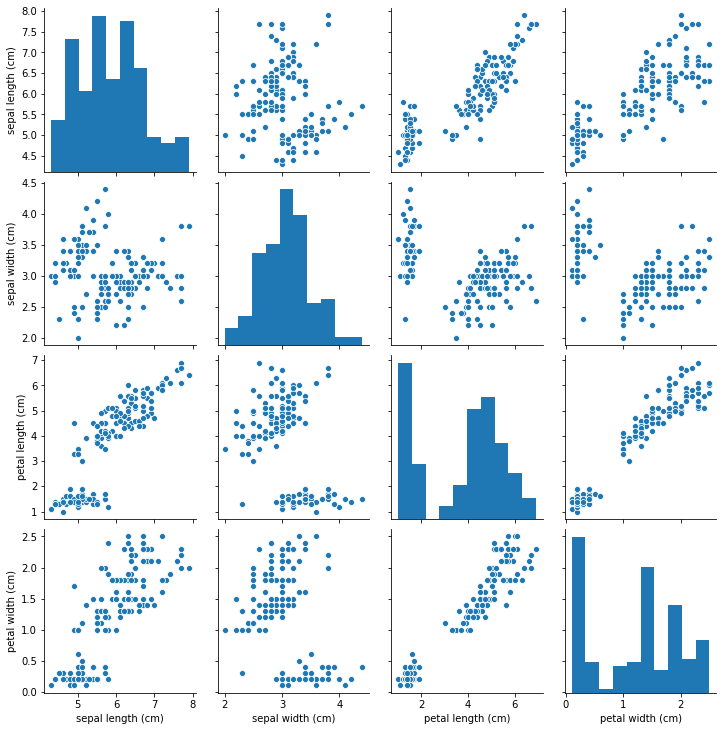

In [13]:
import seaborn as sns
sns.pairplot(iris)

- `pairplot` 에서 데이터에서는 쉽게 2등분은 구분 가능

4개의 dimension으로 이루어진 4차원에서 하단의 그림은 2차원이기 때문에 하단의 동그라미 친곳에서 과연 몇개의 묶음인지 답을 알수가 없음 
 - 뭉치가 큰경우 여러 그룹이 있을수 있어서 확인해봐야함
    -딥러닝 세상에서는 답이 없지만 자기자신을 답으로해서 여러 활용을 함
    

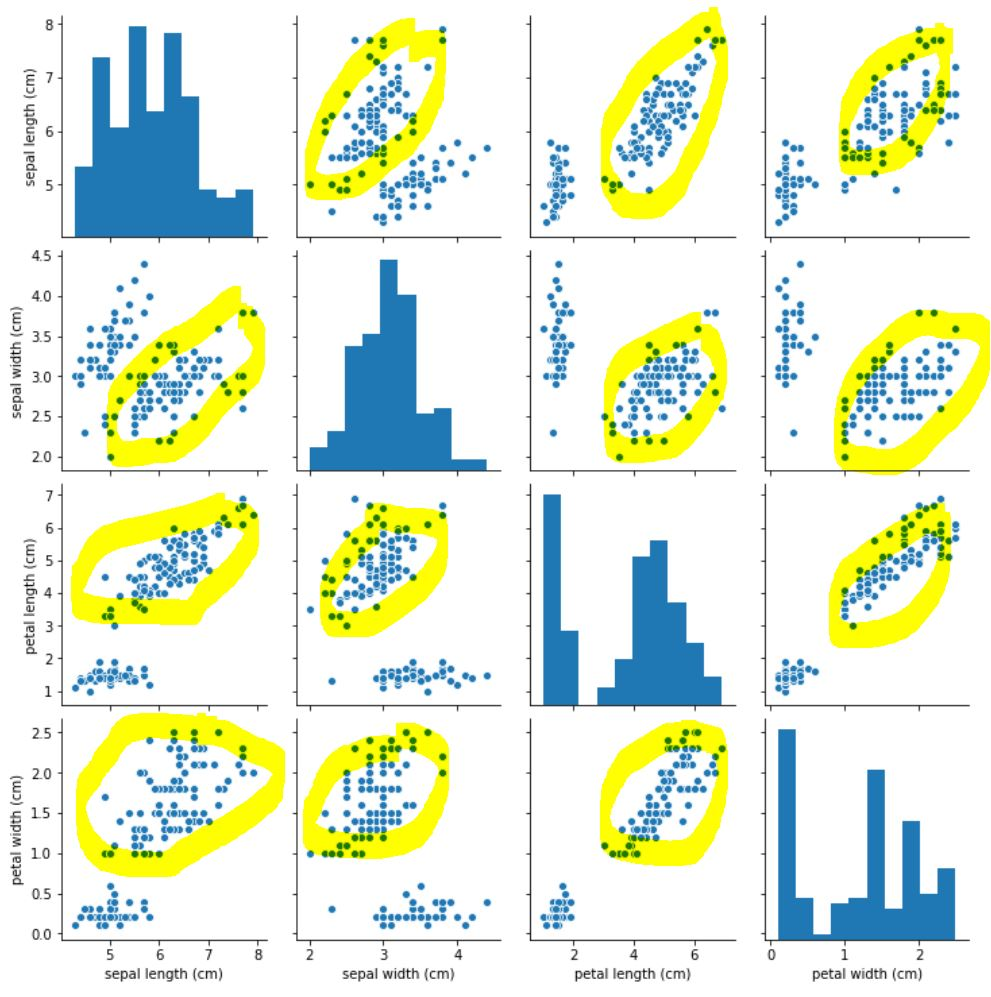

### KMeans
- 단순한 군집화 방법중 하나로 k개로 이루어진 군집의 중심위치를 계산하여 반복해서 이동하여 k-평균 군집화(K-means clustering)
- 군집 갯수 k개를 미리 지정 
    - 시각화를 통해서 군집예상해야함
- 군집화 결과는 랜덤성때문에 임의의 초기값 위치에 민감하기 때문에 군집이 바뀜

하이퍼 파라미터
- `n_clusters`=3
    - 군집 갯수3개가 디폴트값
-  `n_init`=10
    - 임의의 초기값을 10번을 무작위로 시도하여 가장 좋은 결과물을 선택

#### 알고리즘 
1. Initialization : 예로 `n_clusters`=3개의 **임의의 초기값(centroids)** 설정
2. Assign points(1) 
    - 해당 랜덤한 데이터 3개와 각 점간의 거리의 합이 최소화 되는 거리를 계산하여 그룹화함
3. Recompute Centers(1) 
    - centroids는 각 그룹의 평균으로 이동
4. Reassign points &Recompute Centers 
    -  이동이 없을 때 까지 2,3 번을 반복

In [12]:
import mglearn #간략한 그림 설명

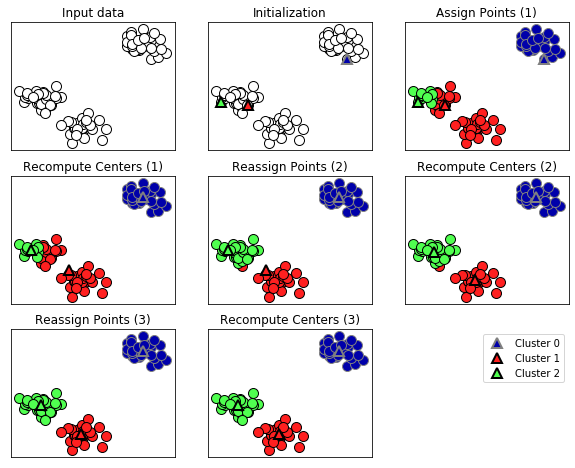

In [18]:
mglearn.plot_kmeans.plot_kmeans_algorithm()

In [5]:
from sklearn.cluster import KMeans

In [6]:
kmean=KMeans(3)

In [7]:
kmean.fit(iris) #학습 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [25]:
vars(kmean)

{'n_clusters': 3,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'deprecated',
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'n_jobs': 'deprecated',
 'algorithm': 'auto',
 '_n_threads': 8,
 'n_features_in_': 4,
 'cluster_centers_': array([[5.006     , 3.428     , 1.462     , 0.246     ],
        [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
        [6.85      , 3.07368421, 5.74210526, 2.07105263]]),
 'labels_': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
        2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1]),
 'inertia_': 78

각 군집의 평균값의 좌표.
- 3개의 군집인데 feature가 4개이므로 3x4의 2차원 array로 표현

In [26]:
kmean.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

랜덤하게 나오기 때문에 두 결과의 타겟값을 동일하게 맞추어야 함
- `map` 으로 값과 바꿀값을 매핑

In [27]:
kmean.labels_ # KMeans 군집화 결과물

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [29]:
data.target #실제 데이터

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [37]:
a=pd.Series(kmean.labels_).map({1:'setosa',0:'versicolor',2:'virginica'})

In [38]:
b=pd.Series(data.target).map({1:'setosa',0:'versicolor',2:'virginica'})

두데이터를 비교하니 134개를 올바르게 군집화함
-  약 0.893의 정확도를 보임

In [41]:
(a==b).sum() #element-wise하게 비교후 동일한 값 갯수

134

In [42]:
(a==b).sum()/len(a)  # 0.893정확도

0.8933333333333333

---
### AgglomerativeClustering
- 병합/계층적 군집화
- 거리/유사도 기반으로 가장 가까운 값들을 합쳐나가면서 군집 갯수를 줄여나감

하이퍼 파라미터 
- `n_clusters`
    - 기본적으로 2개의 군집을 만듦

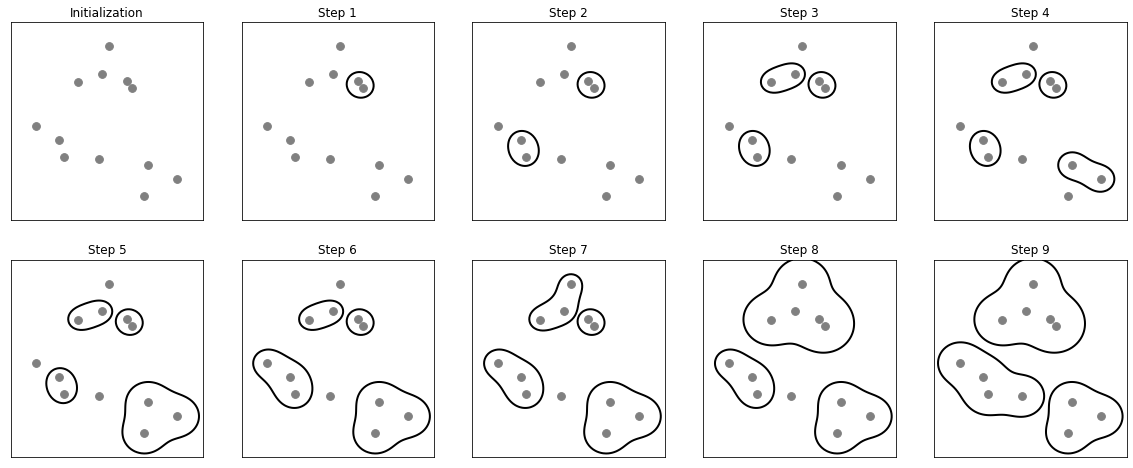

In [60]:
mglearn.plot_agglomerative.plot_agglomerative_algorithm()

위의 군집화된 과정을 아래와 같이 계층적으로 표현하였음

#### 알고리즘
1. 가장 가까운 값을 2개씩 묶음
2. 가장 가까운 값을 3개씩 묶음
3. 점점 묶음의 갯수를 늘리면서 큰 그룹 형성.

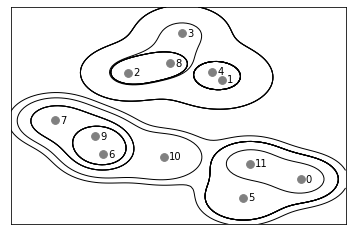

In [16]:
mglearn.plots.plot_agglomerative()

In [1]:
from sklearn.cluster import AgglomerativeClustering

2개로 묶여있음 
-  0,1 로 구분

In [2]:
ag=AgglomerativeClustering()
ag.fit(iris)

In [74]:
ag.n_clusters_

2

In [72]:
vars(ag)

{'n_clusters': 2,
 'distance_threshold': None,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'affinity': 'euclidean',
 'n_features_in_': 4,
 'children_': array([[101, 142],
        [  7,  39],
        [  0,  17],
        [  9,  34],
        [128, 132],
        [ 10,  48],
        [  4,  37],
        [ 19,  21],
        [ 29,  30],
        [ 57,  93],
        [ 80,  81],
        [116, 137],
        [  8,  38],
        [  3,  47],
        [ 27,  28],
        [ 82,  92],
        [ 95,  96],
        [127, 138],
        [  1,  45],
        [ 63,  91],
        [ 65,  75],
        [ 40, 152],
        [123, 126],
        [ 49, 151],
        [112, 139],
        [ 94,  99],
        [ 12, 168],
        [ 88, 166],
        [ 66,  84],
        [ 23,  26],
        [ 53,  89],
        [ 74,  97],
        [ 25, 153],
        [ 46, 157],
        [  2, 163],
        [110, 147],
        [120, 143],
        [136, 148],
        [ 78, 169],
        [ 69, 160],
  

In [73]:
ag.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

3개로 묶여있음 
-  0,1,2 으로 구분

In [76]:
ag=AgglomerativeClustering(3)
ag.fit(iris)

AgglomerativeClustering(n_clusters=3)

In [77]:
vars(ag)

{'n_clusters': 3,
 'distance_threshold': None,
 'memory': None,
 'connectivity': None,
 'compute_full_tree': 'auto',
 'linkage': 'ward',
 'affinity': 'euclidean',
 'n_features_in_': 4,
 'children_': array([[101, 142],
        [  7,  39],
        [  0,  17],
        [  9,  34],
        [128, 132],
        [ 10,  48],
        [  4,  37],
        [ 19,  21],
        [ 29,  30],
        [ 57,  93],
        [ 80,  81],
        [116, 137],
        [  8,  38],
        [  3,  47],
        [ 27,  28],
        [ 82,  92],
        [ 95,  96],
        [127, 138],
        [  1,  45],
        [ 63,  91],
        [ 65,  75],
        [ 40, 152],
        [123, 126],
        [ 49, 151],
        [112, 139],
        [ 94,  99],
        [ 12, 168],
        [ 88, 166],
        [ 66,  84],
        [ 23,  26],
        [ 53,  89],
        [ 74,  97],
        [ 25, 153],
        [ 46, 157],
        [  2, 163],
        [110, 147],
        [120, 143],
        [136, 148],
        [ 78, 169],
        [ 69, 160],
  

In [78]:
ag.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [80]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [83]:
a=pd.Series(ag.labels_).map({1:'setosa',0:'versicolor',2:'virginica'})
b=pd.Series(data.target).map({0:'setosa',1:'versicolor',2:'virginica'})

3개로 나누었을때 134개 맞춤
`kMeans` 와 동일
위의 예시는 데이터가 라벨이 주어졌어서 어느정도 정확한지 비교하기 위해서 쓴것

In [84]:
(a==b).sum()

134

활용.
- 타겟이 없는 경우 clustering 성능이 어느정도 되니 해당 clusteing을 바탕으로 예측모델을 만듦
- 비지도학습은 라벨이 없기 때문에 하이퍼파라미터를 결정하나 정확도를 알수 없음

### dendrogram
계층적 군집에서 계층적 관계를 시각화하는 방법

### linkage
병합/계층적 군집화를 하기 위해 **클러스터 간 가장 비슷한 군집을 측정하는 지표로 **dendrogram에서 그릴때 군집을 위해 필요

   - linkage는 'euclidean'거리가 기본값이며 여러 metric 존재
       - 위의 `AgglomerativeClustering(linkage= 'ward')`가 기본값 



In [3]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [14]:
linkage(iris,method='ward')

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

{'icoord': [[85.0, 85.0, 95.0, 95.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [245.0, 245.0, 263.75, 263.75],
  [230.0, 230.0, 254.375, 254.375],
  [215.0, 215.0, 242.1875, 242.1875],
  [192.5, 192.5, 228.59375, 228.59375],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [210.546875, 210.546875, 302.5, 302.5],
  [175.0, 175.0, 256.5234375, 256.5234375],
  [165.0, 165.0, 215.76171875, 215.76171875],
  [325.0, 325.0, 335.0, 335.0],
  [365.0, 365.0, 375.0, 375.0],
  [395.0, 395.0, 405.0, 405.0],
  [385.0, 385.0, 400.0, 400.0],
  [415.0, 415.0, 425.0, 425.0],
  [392.5, 392.5, 420.0, 420.0],
  [370.0, 370.0, 406.25, 406.25],
  [355.0, 355.0, 388.125, 388.125],
  [435.0, 435.0, 445.0, 445.0],
  [371.5625, 371.5625, 440.0, 440.0],
  [345.0, 345.0, 405.78125, 40

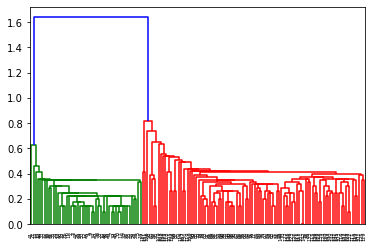

In [14]:
dendrogram(linkage(iris))

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [90.0, 90.0, 110.0, 110.0],
  [62.5, 62.5, 100.0, 100.0],
  [21.25, 21.25, 81.25, 81.25],
  [125.0, 125.0, 135.0, 135.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [130.0, 130.0, 152.5, 152.5],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [141.25, 141.25, 182.5, 182.5],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [255.0, 255.0, 265.0, 265.0],
  [240.0, 240.0, 260.0, 260.0],
  [212.5, 212.5, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [292.5, 292.5, 322.5, 322.5],
  [275.0, 275.0, 307.5, 307.5],
  [231.25, 231.25, 291.25, 291.25],
  [161.875, 161.875, 261.2

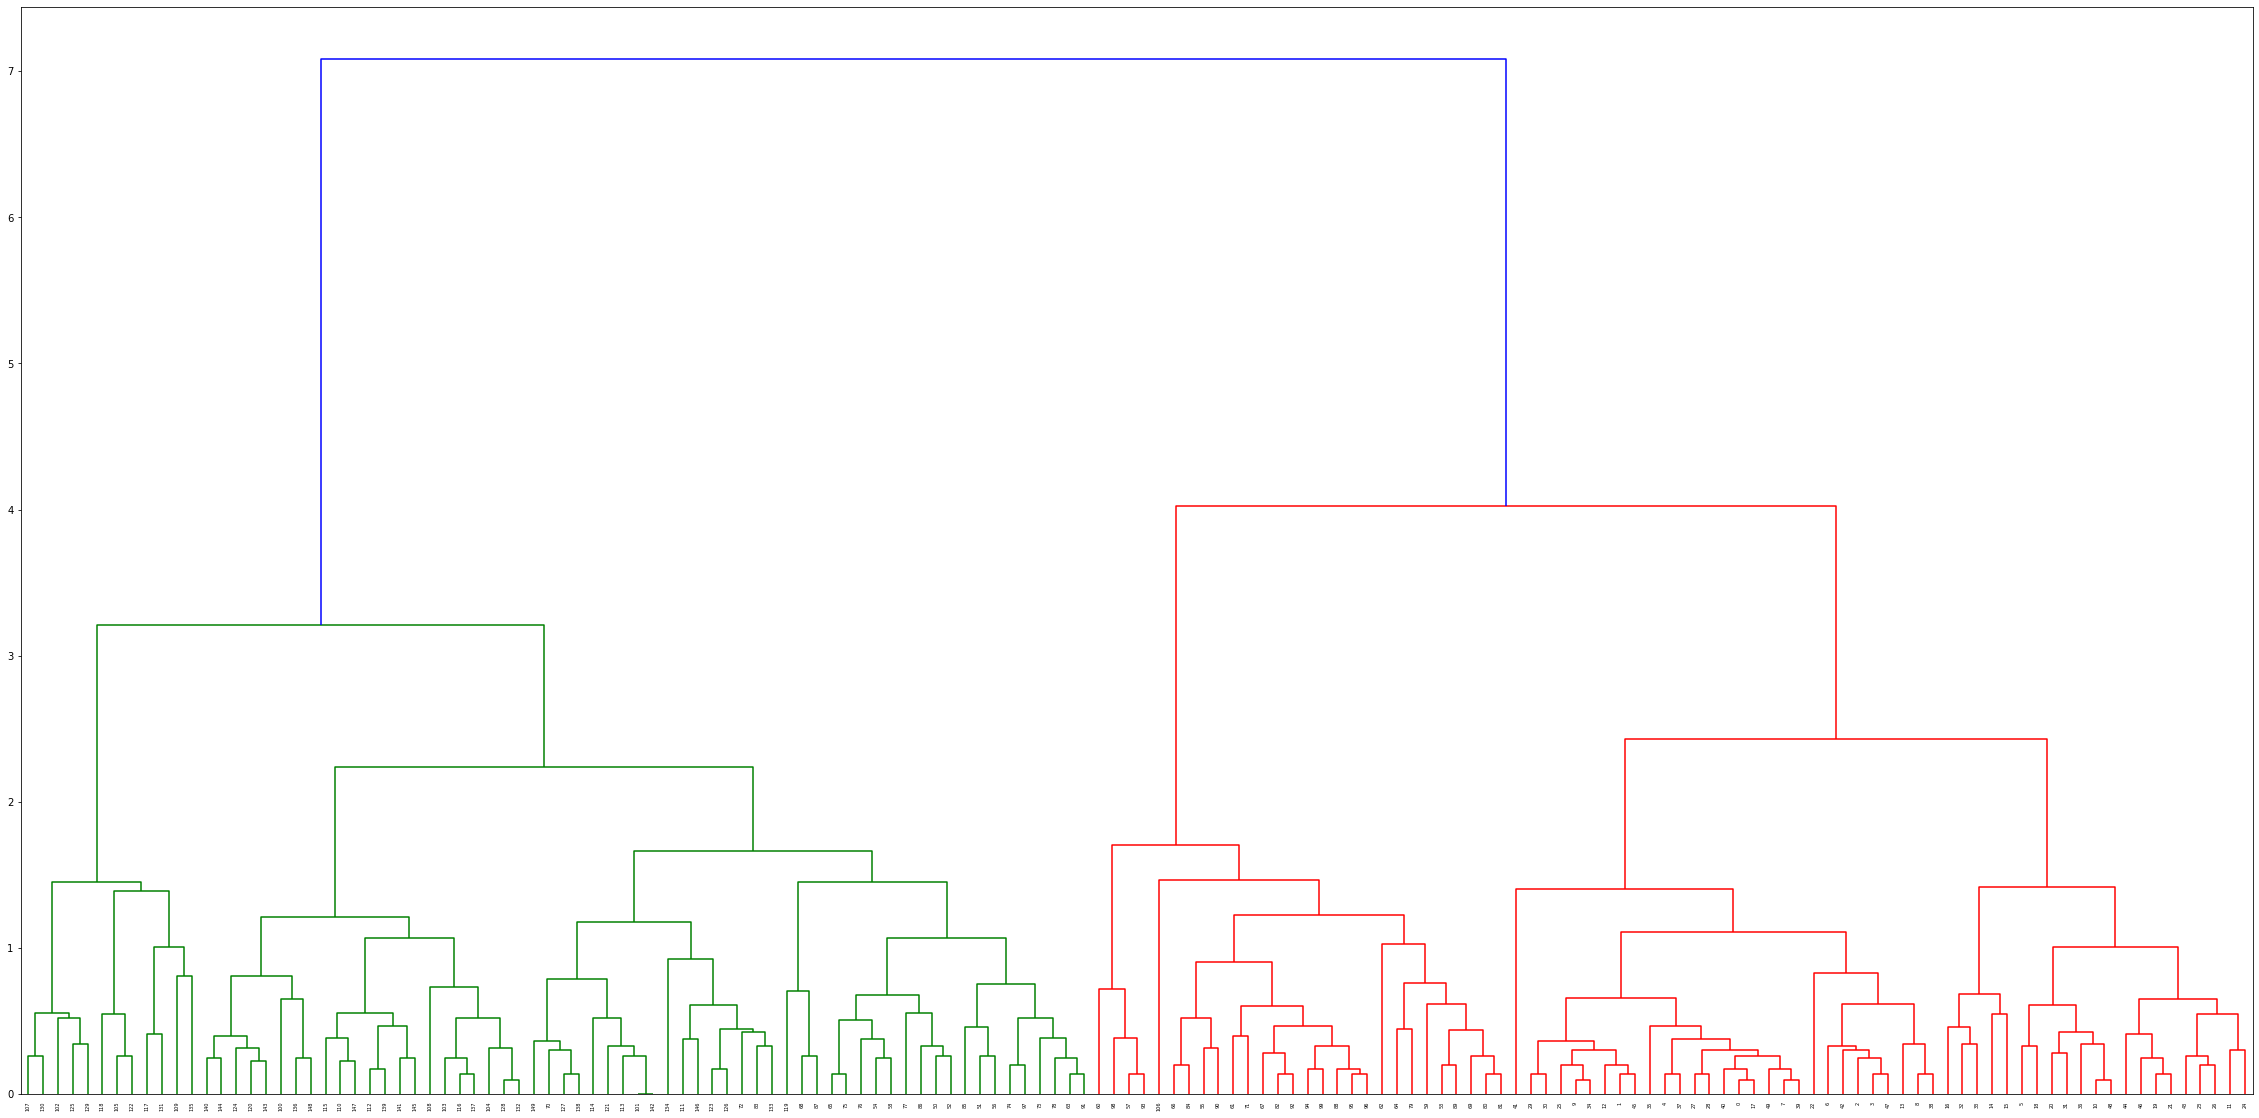

In [18]:
#기본 한개의 군집
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20))
dendrogram(linkage(iris,method ='complete'))

- 10 에서 자르면 3개의 군집(접선)이 나옴.
- 5 에서 자르면 4개의 군집(접선)이 나옴.

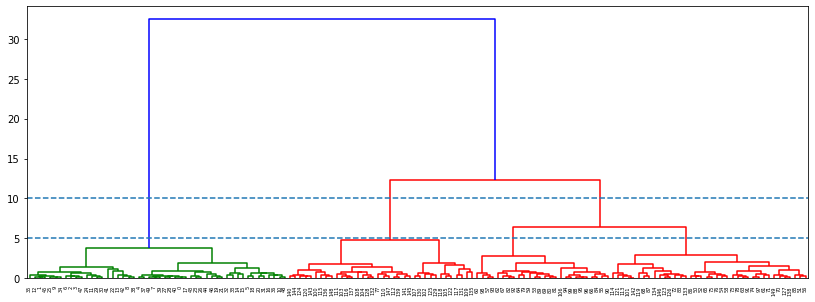

In [29]:
plt.figure(figsize=(14,5))
dendrogram(linkage(iris, 'ward'))
plt.hlines([5,10], 0, 3000, linestyle='dashed')

### DBSCAN
- DBSCAN( Density-Based Spatial Clustering of Applications with Noise) 밀도 기반으로 기준데이터으 반경내의 k개 이상이 있으면 하나의 군집으로 인식
    - 데이터의 형태와 상관없이 밀도 기반으로 K-평균 군집화처럼 사용자가 사전에 지정할 필요가 없음

- 하이퍼 파라미터 
    - `eps $e$` : 최소한의 군집 기준이 되는 데이터 간의 거리
    - `min_samples`: 군집당 최소 샘플갯수 
반지름이 클수록 내부에 속하는 데이터가 많아짐

아래 그림에서는 각 eps과 min_samples 변화함에 따라 군집이 어떻게 변한는지 보여줌
 eps 크거면 군집의 갯수는 줄어듦.
 - 군집: 정수값 0,1,2...
 - outlier : 군집에 속하지 않는 경우 -1

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


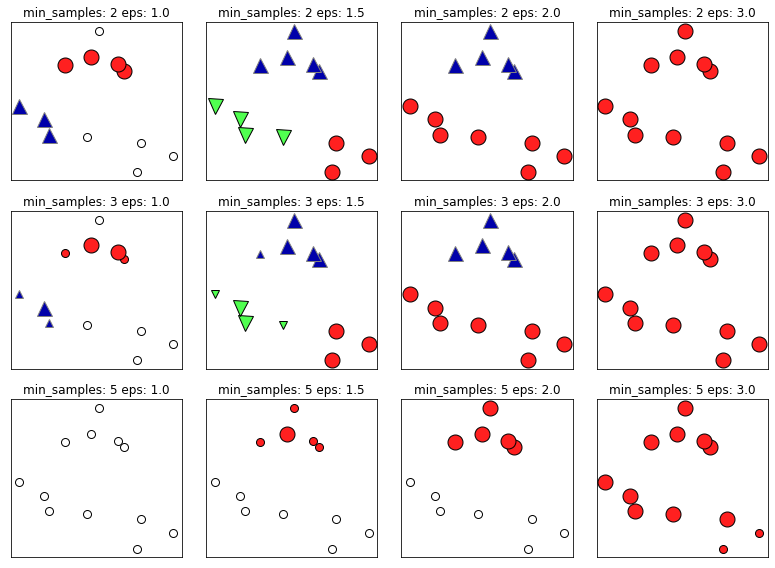

In [98]:
mglearn.plots.plot_dbscan()

In [86]:
from sklearn.cluster import DBSCAN

클래스 인스턴스화 하여 함수처럼 사용

In [88]:
db=DBSCAN(min_samples=10)

In [90]:
db.fit(iris) #학습

DBSCAN(min_samples=10)

크기에 따라서 최소 몇개의 데이터가 있어야하는지 정함

In [91]:
vars(db) #4개로 clustering함.

{'eps': 0.5,
 'min_samples': 10,
 'metric': 'euclidean',
 'metric_params': None,
 'algorithm': 'auto',
 'leaf_size': 30,
 'p': None,
 'n_jobs': None,
 'n_features_in_': 4,
 'core_sample_indices_': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         16,  17,  19,  20,  21,  23,  25,  26,  27,  28,  29,  30,  31,
         34,  35,  36,  37,  38,  39,  40,  42,  43,  45,  46,  47,  48,
         49,  51,  54,  55,  61,  63,  67,  69,  71,  74,  78,  82,  83,
         86,  88,  89,  91,  92,  94,  95,  96,  97,  99, 104, 111, 112,
        116, 123, 126, 127, 138, 140, 147], dtype=int64),
 'labels_': array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
         1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1

AI(인공지능) > ML(기계학습) > DL(딥러닝)


## 기계학습 복습

- 지식을 프로그래밍화
>  지도학습인 경우 지식을 주입하지않고 데이터를 통해서 규칙을 찾아내도록하면 값 추정하여 정답 데이터와 비교함.
      계속해서 오차(loss) 를 최소화 하기 위해서 조정이 가능한 파라미터 값을 변경
      예. 회귀분석 $y=ax+b$
            - 매번 값마다 차이가 나서 데이터와 추정값간의 차이(오차)를 가장 줄이는 $a,b$를 찾음


- 기기학습: 파라미터를 랜덤하게 선택하거나 특정 값 지정하여 넣음.
-  딥러닝: 학습률을 랜덤 설정에서 시작해서 작게해서 fine tunning 함.
    - 기본적인 선형대수, 미적분해석학과 밀접한 관련이 있음
        - 기계학습과 달리 통계적인 부분인 줄어듦
    *   하이퍼 파라미터 : 학습을 통해서 찾을 수 없기 때문에 사람이 지정하는 것이므로 구분 주의
    
---
## Deep Learning
- 지금은 딥러닝의 시대이므로 Fundamental을 잘 닦아야함!
    - back propagation 에서 수학이 문제 (선형대수, 미적분 밀접한 관련)

- CS에서는 딥러닝은 **Artificial Neural Networks로 레이어가 많은 인공신경망**으로 70년대부터 나온 알고리즘
- 모델이 복잡해지면 성능이 좋아지고 과대적합도 증가함
    - 딥러닝에서는 레이어가 많은 경우를 의미
    
    
오래된 알고리즘인데 왜 2000년대 후반부터 갑자기 알려졌을까 ?
    
인기가 많아진 배경
1. 빅 데이터
    - 다양한 반정형,비정형 데이터(사진,영상, 음성..)
    
2. 알고리즘 발전
   - few feature engineering
        - 학습을 통해서 자동화 시키므로 사용 편이
   - state-of-the-art performant(SOTA) : 현재 최고의 기술을 명칭함
        - 좋은 정확성
        - 속도도 빠름
        
3. GPU 가속기능(Acceleration) 때문에 동시 실행 많이 함.
        - NVIDIA Cuda Process(쿠다 프로세스) 쿠다 갯수만큼 실행 가능.
        - 모델이 복잡해지기 때문에 결과를 약 50배 빠르게 가져다 줌
    
 전통적인 알고리즘은 데이터가 많으면 성장속도의 차가 느슨해짐.
  - 플라토(고원) 현상
 
 딥러닝은 데이터가 많을수록 성능이 좋아짐
  -  데이터가 어느정도 많아야 효과 좋은지는 learning curve로 확인 

In [15]:
from sklearn.linear_model import Perceptron  #선형모델에 속함
per= Perceptron()

### Perceptron
- 딥러닝의 시작
    - 1957년, Frank Rosenblat 지능=뇌라는 가정으로 뇌를 구성하는 최소의 구성 세포 단위 **뉴런**을 모방한 알고리즘
        - 전기자극을 받아서 전달함
        - 뉴런이 전기 신호에 의해서 정보를 전달함 
    - x  입력 신호
    - y 출력 신호, 
    - w 가중치(weight)
    - bias 편향 : 자극의 민감도를 표현.
    - $\theta$, threshold 기준으로 정보전달 여부를 결정함
        - peceptron 예제에서는 0
 
 
 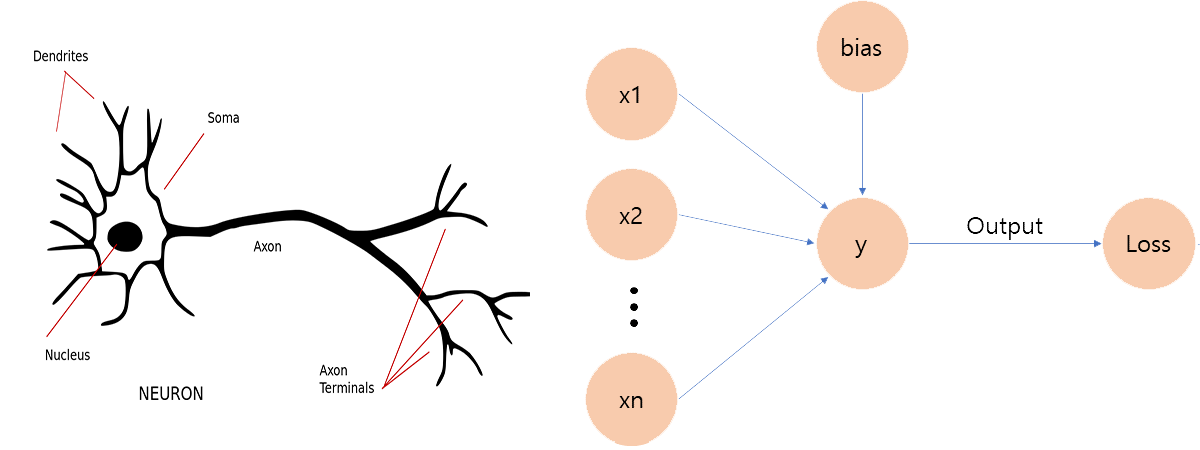
    
    뇌의 간단한 신경구조를 모델링(1차식 - 선형) :
   > - 1  , $w_1 x_1 +w_2 x_2 +b \geq 0$ 
   > -  0 , $w_1 x_1 +w_2 x_2 +b  <0$ 

### OR
- 둘 중 하나라도 1이면 1
  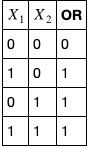

  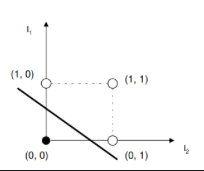
  - $b <0 $ 
  - $ w_1+b \geq0$  
  - $ w_2+b \geq 0$  
  -   $ w_1+w_2+b \geq 0$

넘파이를 통한 퍼셉트론 구현

In [38]:
import numpy as np

In [42]:
data= np.array([[0,0],[0,1],[1,0],[1,1]])

In [47]:
def perceptron_or(data):

    w1,w2=0.4,0.4
    w=np.array([w1,w2])
    bias=-0.2
    value=  np.sum(w *data,axis=1)+bias

    return np.where(value >= 0,1,0)

In [48]:
perceptron_or(data)

array([0, 1, 1, 1])

### AND
- 모두  1이어야 1
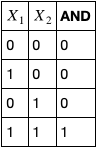

   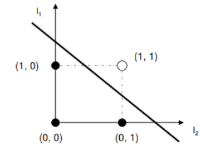
   -  $b <0$
   -  $ w_1+b < 0 $ 
   -  $ w_2+b < 0 $ 
   -  $ w_1+w_2+b \geq 0 $
   

In [54]:
def perceptron_and(data):

    w1,w2=0.4,0.4
    w=np.array([w1,w2])
    bias=-0.5
    value=  np.dot(w,data.T)+bias

    return np.where(value>=0,1,0)

In [52]:
perceptron_and(data)

array([0, 0, 0, 1])

---
위의 perceptron함수를 클래스로 만듦.
    -  assert로 에러 방지 

In [49]:
#class
class Perceptron:
    def __init__(self,kind='and'):
        '''input and /or '''
        self.kind=kind
        assert self.kind in ['and','or'], 'and 또는 or 입력'
    def predcit(self,data):
        w1,w2=0.4,0.4
        if self.kind=='and':        
            bias=-0.5

        elif self.kind=='or':   
            bias=-0.2          
               
        w=np.array([w1,w2])
        value=  np.sum(w *data,axis=1)+bias
       

        return np.where(value >= 0,1,0)

클래스와 위에서 만든 function 과 비교

In [50]:
p=Perceptron() #기본 :'and'

In [51]:
p.predcit(data)   

array([0, 0, 0, 1])

In [52]:
perceptron_and(data)

array([0, 0, 0, 1])

In [53]:
p=Perceptron('or')

In [169]:
p.predcit(data)

array([0, 1, 1, 1])

In [29]:
perceptron_or(data) 

array([0, 1, 1, 1])

class에서 'and','or'이 아닌경우 AssertionError: and 또는 or 입력 라는 메시지 출력

In [30]:
p=Perceptron('xor')
p.predcit(data)

AssertionError: and 또는 or 입력

- decison boundary 가 선형이여서 OR, AND 문제에서는 선형 구분이 가능한데 비선형 문제에서는 불가
    - Marvin Minsky(마빈 민스키)가 XOR은 해결할 수 없는 한계를 수학적으로 증명
     - 이 때문에 인공지능의 1차 겨울이 찾아옴
3. XOR 문제

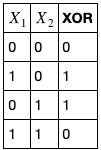
   -  $b <0$
   -  $ w_1+b > 0 $ 
   -  $ w_2+b > 0 $ 
   -  $ w_1+w_2+b < 0 $     

---
### Multi-Layer Perceptron(MLP)/Aritificial Neural Network
 AND + OR perceptron 을 합쳐서 XOR 문제를 해결
 - layer 동일한 데이터를 입력 받음 
 layer 갯수:  hidden layer , output layer
    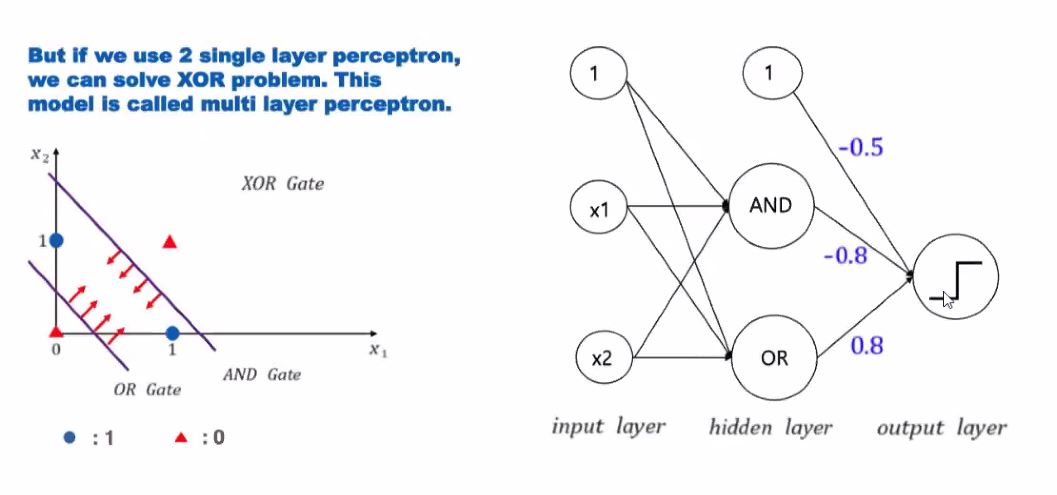

더 이상 linear_model에 속하지 않고 neural_network(신경망)으로  분류됨

In [31]:
from sklearn.linear_model import Perceptron  #선형모델에 속함
per= Perceptron()

from sklearn.neural_network import MLPClassifier 
mlp=MLPClassifier((4,4,4,4))

#### 책 추천
- 핸즈온 머신러닝
- 신경망과 심층학습(수학이 많음)
- 프로그래머를 위한 선형대수, 기초 해석학
- 심층학습 (교과서, 원서 추천)
- 케라스 창시자에게 배우는 딥러닝( 2판 곧 나옴)
- 그로킹 딥러닝 (쉬움)
- 신경망 교과서
- 신경망과 심층학습

pytorch : https://tutorials.pytorch.kr/beginner/pytorch_with_examples.html
  -   직접 구현하고 나중에 tensorflow로 넘어감